In [1]:
### check image resize cifar 10
#https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

### Torch Tutorial Cifar-10

#### Import functions

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

In [3]:
torch.set_default_device('cpu') 

In [4]:
device = torch.device('cuda:0')

#### Prepared DataSet

In [5]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 64

trainset = torchvision.datasets.CIFAR10(root="./../data/", train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = torchvision.datasets.CIFAR10(root="./../data/", train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


#### Prepare Model

In [6]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self, bits):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.hash1 = nn.Linear(120, bits)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(bits, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.hash1(x)
        hash_= self.sigmoid(x);
        x = self.fc2(x)
        return x, hash_

HASH_SIZE = 64
net = Net( HASH_SIZE )
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (hash1): Linear(in_features=120, out_features=64, bias=True)
  (sigmoid): Sigmoid()
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)

#### Train Parameters

In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
iterations = 15

In [117]:
for epoch in range( iterations ):  # loop over the dataset multiple times

    running_loss = 0.0
    total = 0
    correct = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs, hash_ = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 0:
            print(i + 1, " ", end="")
            
        total += labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()

    print(f'[{epoch + 1}] loss: {running_loss} accurancy: {100 * correct // total} %')

1  101  201  301  401  501  601  701  [1] loss: 135.70412968471646 accurancy: 93 %
1  101  201  301  401  501  601  701  [2] loss: 135.75516540929675 accurancy: 93 %
1  101  201  301  401  501  601  701  [3] loss: 135.557621832937 accurancy: 93 %
1  101  201  301  401  501  601  701  [4] loss: 135.7344008386135 accurancy: 93 %
1  101  201  301  401  501  601  701  [5] loss: 135.62759321555495 accurancy: 93 %
1  101  201  301  401  501  601  701  [6] loss: 135.62428053840995 accurancy: 93 %
1  101  201  301  401  501  601  701  [7] loss: 135.58444859087467 accurancy: 93 %
1  101  201  301  401  501  601  701  [8] loss: 135.61104176566005 accurancy: 93 %
1  101  201  301  401  501  601  701  [9] loss: 135.62416483461857 accurancy: 93 %
1  101  201  301  401  501  601  701  [10] loss: 135.85613089613616 accurancy: 93 %
1  101  201  301  401  501  601  701  [11] loss: 135.7445394359529 accurancy: 93 %
1  101  201  301  401  501  601  701  [12] loss: 135.618285253644 accurancy: 93 %
1  101 

#### Save Model

In [123]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

#### Load Model

In [124]:
net = Net( HASH_SIZE ).to(device)
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

#### Check visually

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

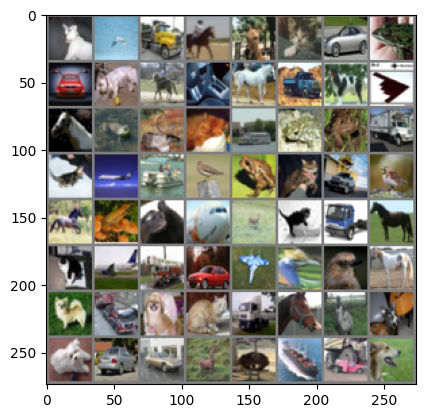

cat   cat   cat   cat   cat   cat   cat   bird  cat   cat   cat   cat   bird  cat   cat   cat   cat   cat   cat   bird  cat   cat   cat   cat   cat   cat   cat   bird  cat   cat   cat   cat   cat   bird  cat   cat   cat   cat   cat   bird  cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   bird  cat  
tensor([0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
        1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
        1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 0., 1., 1., 0.], device='cuda:0',
       grad_fn=<SelectBackward0>)


In [8]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

outputs, hashes = net(images.to(device))
_, predicted = torch.max(outputs, 1)

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[predicted[j]]:5s}' for j in range(predicted.shape[0])))
print(torch.round(hashes)[0])

#### Check Accurancy on test set

In [127]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs, _ = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 60 %


In [128]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs, _ = net(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 62.8 %
Accuracy for class: car   is 73.0 %
Accuracy for class: bird  is 52.3 %
Accuracy for class: cat   is 41.0 %
Accuracy for class: deer  is 52.8 %
Accuracy for class: dog   is 49.4 %
Accuracy for class: frog  is 73.0 %
Accuracy for class: horse is 65.8 %
Accuracy for class: ship  is 72.8 %
Accuracy for class: truck is 65.7 %


### CustomDataSet ( ImageNet )

In [119]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.images[idx], self.labels[idx]

In [120]:
IMAGENET_PATH = "../data/Imagenet32_train/"

In [132]:
import os
import _pickle as cPickle

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = cPickle.load(fo)
    return dict

def load_databatch(data_folder, idx, img_size=32):
    data_file = os.path.join(data_folder, 'train_data_batch_')

    dict_ = unpickle(data_file + str(idx))

    images = dict_['data']
    labels = dict_['labels']

    ## images_without_mean = dict_['mean']   ??? check is there are better results or not

    return images, labels

In [133]:
images2, labels2 = load_databatch(IMAGENET_PATH, 1)

In [138]:
print( type(images2) )
print( type(labels2) )

<class 'numpy.ndarray'>
<class 'list'>


In [153]:
images2 = images2.astype(np.float32).reshape(128116,3,32,32)

In [154]:
dataset = CustomDataset(torch.from_numpy(images2), torch.Tensor(labels2) )

In [155]:
ImageNetLoader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

In [156]:
correct = 0
total = 0

with torch.no_grad():
    for data in ImageNetLoader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs, _ = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 0 %


### Concat two models

In [96]:
class Net2(nn.Module):
    def __init__(self, bits):
        super().__init__()
        self.fc1 = nn.Linear(2048, 256)
        self.hash1 = nn.Linear(256, bits)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(bits, 10)

    def forward(self, x):
        x = x.to(torch.float32)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.hash1(x)
        hash_= self.sigmoid(x);
        x = self.fc2(x)
        return x, hash_

HASH_SIZE = 64
net2 = Net2( HASH_SIZE )
net2.to(device)

Net2(
  (fc1): Linear(in_features=2048, out_features=256, bias=True)
  (hash1): Linear(in_features=256, out_features=64, bias=True)
  (sigmoid): Sigmoid()
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)

In [97]:
from torchvision import models

resnet50 = models.resnet50(pretrained = True) # weights=ResNet50_Weights.DEFAULT
resnet50 = resnet50.to(device)
resnet50.fc = torch.nn.Identity()

for param in resnet50.parameters():
    param.requires_grad = False

for param in resnet50.fc.parameters():
    param.requires_grad = True
    
for param in resnet50.layer4.parameters():
    param.requires_grad = True

resnet50

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [98]:
net2 = Net2( HASH_SIZE ).to(device)

In [99]:
model2 = nn.Sequential(resnet50, net2)

In [100]:
model2

Sequential(
  (0): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0)

In [101]:
# https://discuss.pytorch.org/t/add-layers-on-pretrained-model/88760
# https://stackoverflow.com/questions/53901603/how-to-transfer-weight-of-own-model-to-same-network-but-different-number-of-clas
# https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
# https://discuss.pytorch.org/t/copying-weights-from-one-net-to-another/1492
# https://github.com/flyingpot/pytorch_deephash/blob/master/net.py

#https://www.kaggle.com/code/max237/resnet50-transfer-learning-in-pytorch
#https://datagen.tech/guides/computer-vision/resnet-50/#
#https://medium.com/@bravinwasike18/building-a-deep-learning-model-with-keras-and-resnet-50-9dd6f4eb3351
#https://blog.roboflow.com/how-to-use-resnet-50/
#https://pytorch.org/hub/nvidia_deeplearningexamples_resnet50/

In [102]:
criterion2 = nn.CrossEntropyLoss()
#optimizer2 = optim.AdamW(model2.parameters(), lr=0.000025, weight_decay=50)
optimizer2 = optim.SGD(model2.parameters(), lr=0.001, momentum=0.9)
iterations = 50

In [111]:
for epoch in range( 10 ):  # loop over the dataset multiple times

    running_loss = 0.0
    total = 0
    correct = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer2.zero_grad()

        #if epoch > 1:
        #    for param in model2[0].layer4.parameters():
        #        param.requires_grad = False

        outputs, hash_ = model2(inputs)
        loss = criterion2(outputs, labels)
        loss.backward()
        optimizer2.step()
        running_loss += loss.item()
        if i % 100 == 0:
            print(i + 1, " ", end="")
            
        total += labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()

    print(f'[{epoch + 1}] loss: {running_loss} accurancy: {100 * correct // total} %')

1  101  201  301  401  501  601  701  [1] loss: 57.36710210703313 accurancy: 97 %
1  101  201  301  401  501  601  701  [2] loss: 48.66970845963806 accurancy: 97 %
1  101  201  301  401  501  601  701  [3] loss: 43.801389871980064 accurancy: 98 %
1  101  201  301  401  501  601  701  [4] loss: 43.38364783488214 accurancy: 98 %
1  101  201  301  401  501  601  701  [5] loss: 44.82744709204417 accurancy: 98 %
1  101  201  301  401  501  601  701  [6] loss: 41.71192615991458 accurancy: 98 %
1  101  201  301  401  501  601  701  [7] loss: 40.98288428632077 accurancy: 98 %
1  101  201  301  401  501  601  701  [8] loss: 39.21603174007032 accurancy: 98 %
1  101  201  301  401  501  601  701  [9] loss: 35.88509605336003 accurancy: 98 %
1  101  201  301  401  501  601  701  [10] loss: 35.85586286056787 accurancy: 98 %


In [113]:
#PATH = './modelResnetAndCifar.pth' # 45 jeden optimizer, pozniej 2-gi optimizer
PATH = './modelResnetAndCifar5.pth' # jeden optimizer
torch.save(net.state_dict(), PATH)

In [114]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs, _ = model2(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 75.9 %
Accuracy for class: car   is 79.7 %
Accuracy for class: bird  is 63.7 %
Accuracy for class: cat   is 51.7 %
Accuracy for class: deer  is 64.7 %
Accuracy for class: dog   is 63.0 %
Accuracy for class: frog  is 80.5 %
Accuracy for class: horse is 75.9 %
Accuracy for class: ship  is 78.9 %
Accuracy for class: truck is 79.3 %


In [115]:
correct = 0
total = 0

total_labels = None
total_predictions = None

with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs, _ = model2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        total_labels.append(

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 71 %


#### Another try 

In [287]:
resnet50_2 = models.resnet50(pretrained = True)
resnet50_2 = resnet50_2.to(device)

for param in resnet50_2.parameters():
    param.requires_grad = False

resnet50_2.fc = nn.Sequential(nn.Linear(2048, 256),
                         nn.ReLU(),
                         nn.Linear(256, 1),
                         nn.Sigmoid())

In [288]:
for param in resnet50_2.fc.parameters():
    param.requires_grad = True
    
# Unfreeze the last few layers of the model

for param in resnet50_2.layer4.parameters():
    param.requires_grad = True

In [119]:
# https://www.kaggle.com/code/kmldas/cifar10-resnet-90-accuracy-less-than-5-min
# https://www.kaggle.com/code/max237/resnet50-transfer-learning-in-pytorch

### mAP - evaluate

In [120]:
#https://github.com/aladdinpersson/Machine-Learning-Collection/blob/master/ML/Pytorch/object_detection/metrics/mean_avg_precision.py
#https://www.youtube.com/watch?v=FppOzcDvaDI
#https://lightning.ai/docs/torchmetrics/stable/detection/mean_average_precision.html
#https://www.v7labs.com/blog/mean-average-precision
#https://yanfengliux.medium.com/the-confusing-metrics-of-ap-and-map-for-object-detection-3113ba0386ef
#https://github.com/flyingpot/pytorch_deephash/blob/master/evaluate.py

#https://medium.com/voice-tech-global/machine-learning-confidence-scores-all-you-need-to-know-as-a-conversation-designer-8babd39caae7

In [123]:
# https://www.youtube.com/watch?v=FppOzcDvaDI
# https://pytorch.org/torcheval/stable/generated/torcheval.metrics.functional.binary_auprc.html
# https://pytorch.org/torcheval/main/generated/torcheval.metrics.functional.multiclass_auprc.html#torcheval.metrics.functional.multiclass_auprc

In [126]:
# praca magisterska
# 1. spor recall - precision
# 2. mAP co to jest 
# 3. PyTorch zapewnia metryki
# 4. dHash, pHash itp.
# 5. trzeci wlasny sens, przyklad w zyciu codziennym czy to ma sens ?

In [129]:
#!pip install torcheval

In [132]:
correct = 0
total = 0

testloader2 = torch.utils.data.DataLoader(testset, batch_size=len(testset), shuffle=False)

with torch.no_grad():
    for data in testloader2:
        images, labels = data[0].to(device), data[1].to(device)
        outputs, _ = model2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:78: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return func(*args, **kwargs)


Accuracy of the network on the 10000 test images: 73 %


In [143]:
print(outputs.shape)
print(labels.shape)
print(outputs[0])

torch.Size([10000, 10])
torch.Size([10000])
tensor([-6.9334, -0.6050, -3.7579, 18.6863, -2.8800,  9.2791,  1.1527, -4.3578,
        -7.4624, -3.0561], device='cuda:0')


In [140]:
from torcheval.metrics.functional import multiclass_auprc

In [146]:
print( "mAP value equals to: ", multiclass_auprc(outputs, labels))

mAP value equals to:  tensor(0.7535, device='cuda:0')
